## Preprocessing

In [1]:
# Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Importing and reading the charity_data.csv file
import pandas as pd 
import hvplot.pandas

# Ignoring warning messages that might be generated during the execution of the program
import warnings
warnings.filterwarnings('ignore')

# Importing holoviews to save plots as png files
import holoviews as hv
import os

# Importing the required libraries for the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Dropping the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determining the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Looking at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choosing a cutoff value and creating a list of application types to be replaced by using the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replacing in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Checking to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Looking at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# Looking at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]
classification_counts.head()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: count, dtype: int64

In [8]:
# Choosing a cutoff value and creating a list of classifications to be replaced using the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [9]:
# Converting categorical data to numeric with `pd.get_dummies`
numeric_application_df = pd.get_dummies(application_df, dtype=int)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Splitting the preprocessed data into features and target arrays
y = numeric_application_df.IS_SUCCESSFUL
X = numeric_application_df.drop(columns=["IS_SUCCESSFUL"], axis=1)

# Splitting the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Attempt 1
## Compiling, Training and Evaluating the Model as Below
### Cutoff Value Application:500
### CutOff Value Classification:300
### Layer 1 Hidden Nodes: 10
### Layer 1: RELU
### Layer 2 Hidden Nodes: 5
### Layer 2: RELU
### Output Layer: SIGMOID
### Compiling: Loss=binary_crossentropy, optimizer=adam, metrics=accuracy
### Training the model with epochs=50

In [12]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                450       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Training the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


804/804 [==============================] - 2s 2ms/step - loss: 0.6195 - accuracy: 0.6918
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7257
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5631 - accuracy: 0.7252
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7269
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.7288
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7287
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7291
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7294
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7297
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5554 - accuracy: 0.7303
Epoch 11/5

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5524 - accuracy: 0.7265 - 523ms/epoch - 2ms/step
Loss: 0.5523629784584045, Accuracy: 0.7265306115150452


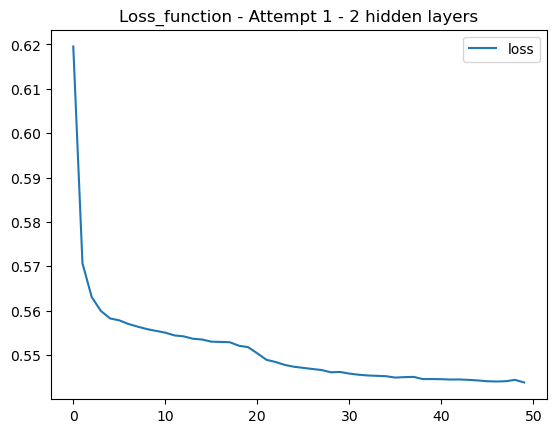

In [18]:
# Plotting the loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["loss"])
plt.title("Loss_function - Attempt 1 - 2 hidden layers")
plt.legend(["loss"])

# Saving the plot to a file in the 'Output' folder
plt.savefig(os.path.join("Output", "Attempt1_Loss_Plot.png"))

plt.show()

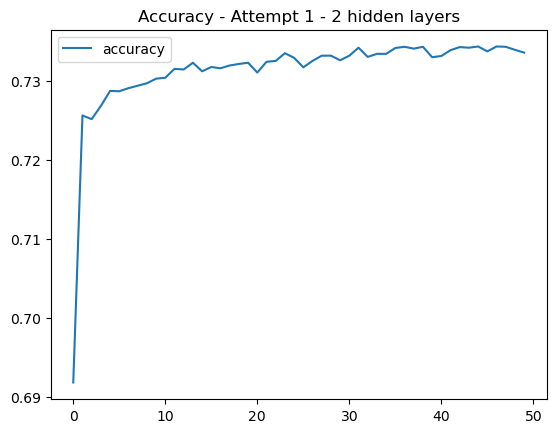

In [19]:
# Plotting the accuracy
plt.plot(fit_model.history["accuracy"])
plt.title("Accuracy - Attempt 1 - 2 hidden layers")
plt.legend(["accuracy"])

# Saving the plot to a file in the 'output' folder
plt.savefig(os.path.join("Output", "Attempt1_Accuracy_Plot.png"))

plt.show()

In [20]:
# Exporting model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Attempt1.h5")

# Attempt 2
## Compiling, Training and Evaluating the Model as Below
### Cutoff Value Application:500
### CutOff Value Classification:300
### Layer 1 Hidden Nodes: 10
### Layer 1: RELU
### Layer 2 Hidden Nodes: 10
### Layer 2: RELU
### Layer 3 Hidden Nodes: 10
### Layer 3: TANH
### Output Layer: SIGMOID
### Compiling: Loss=binary_crossentropy, optimizer=adam, metrics=accuracy
### Training the model with epochs=100

In [22]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                450       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Training the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5901 - accuracy: 0.6965
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5578 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7293
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7328
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7328
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7330
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7334
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accura

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5516 - accuracy: 0.7249 - 666ms/epoch - 2ms/step
Loss: 0.5515609979629517, Accuracy: 0.7248979806900024


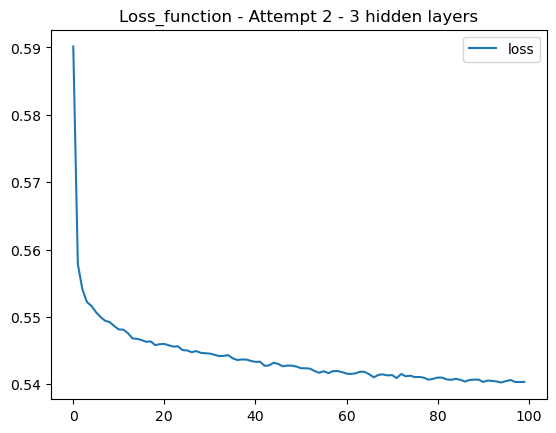

In [27]:
# Plotting the loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["loss"])
plt.title("Loss_function - Attempt 2 - 3 hidden layers")
plt.legend(["loss"])

# Saving the plot to a file in the 'Output' folder
plt.savefig(os.path.join("Output", "Attempt2_Loss_Plot.png"))

plt.show()

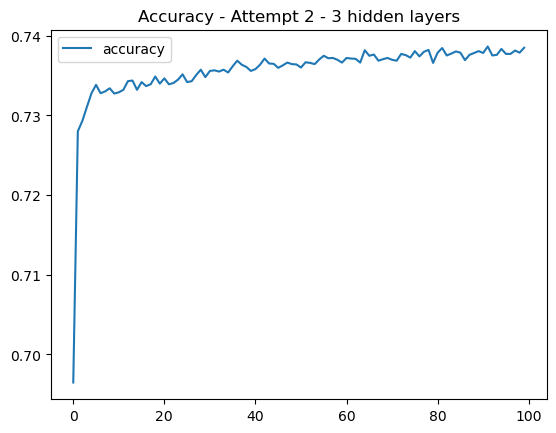

In [28]:
# Plotting the accuracy
plt.plot(fit_model.history["accuracy"])
plt.title("Accuracy - Attempt 2 - 3 hidden layers")
plt.legend(["accuracy"])

# Saving the plot to a file in the 'output' folder
plt.savefig(os.path.join("Output", "Attempt2_Accuracy_Plot.png"))

plt.show()

In [29]:
# Exporting model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Attempt2.h5")